In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the data from the csv file:
data = pd.read_csv("C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Road Accident Data.csv")

In [5]:
data.head(100)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Longitude,Light_Conditions,Local_Authority_(District),...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,-0.201349,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Clear,Cars
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,-0.199248,Daylight,Kensington and Chelsea,...,11,2,Metropolitan Police,Wet,Single carriageway,30,10:59,Urban,Clear,Cars
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Minor,51.486668,-0.179599,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Clear,Cars
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,-0.203110,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Frosty,Single carriageway,30,08:10,Urban,Other,Heavy Motorcycles
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,-0.173445,Darkness,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Clear,Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200901BS70122,04-03-2021,Wednesday,Auto traffic signal,T or staggered junction,Minor,51.486622,-0.170814,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Wet,Single carriageway,30,07:05,Urban,Clear,Cars
96,200901BS70123,07-02-2021,Saturday,Give way or uncontrolled,Crossroads,Minor,51.504966,-0.194000,Daylight,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,13:15,Urban,Other,Cars
97,200901BS70124,17-03-2021,Tuesday,Auto traffic signal,Crossroads,Minor,51.495660,-0.173766,Darkness,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,23:00,Urban,Clear,Cars
98,200901BS70126,24-02-2021,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,51.490535,-0.173827,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,08:00,Urban,Clear,Public Transport


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307972 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Longitude                   307973 non-null  float64
 8   Light_Conditions            307973 non-null  object 
 9   Local_Authority_(District)  307973 non-null  object 
 10  Carriageway_Hazards         307973 non-null  object 
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [7]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'],format = "%d-%m-%Y")
data['Time'] = pd.to_datetime(data['Time'],format='%H:%M')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307972 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Longitude                   307973 non-null  float64       
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         307973 non-null  object        
 11  Number_of_Casualties        307973 non-

In [9]:
data.isnull().sum()
# Data set has 1525 Null value in Road_Type column and 1 Accident_Index column which is null. 

Accident_Index                   1
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Longitude                        0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions          0
Road_Type                     1525
Speed_limit                      0
Time                             0
Urban_or_Rural_Area              0
Weather_Conditions               0
Vehicle_Type                     0
dtype: int64

In [10]:
data['Road_Type'].replace('null', np.nan, inplace=True)
data['Road_Type'].fillna(data['Road_Type'].mode().iloc[0], inplace=True)

In [11]:
data.isnull().sum()

Accident_Index                1
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Longitude                     0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [12]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Clear      247644
Raining     38403
Other       14859
Snowy        5377
Foggy        1690
Name: count, dtype: int64

In [13]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Cars                       245337
Vans and Goods Vehicles     24729
Heavy Motorcycles           14511
Small Vehicles              10555
Public Transport             9507
Other vehicle                2516
Specialized Vehicles          752
Bicycle                        66
Name: count, dtype: int64

In [15]:
data.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Longitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [18]:
data['Speed_limit'].value_counts()

Speed_limit
30    200040
60     46826
40     25650
70     22362
50     10191
20      2899
10         3
15         2
Name: count, dtype: int64

# Data Analysis part 
1. Percentage contribution of each severity to the accidents.
2. Weekly count of accidents and show that on a graph(histogram)
3. Calculate the average casulality at different range of Speed_limit

### Temporal Analysis:
1. Distribution of accidents over days of the week and months.
2. Distribution of accidents over different times and are there specific times fo the day when accidents are more likely to occur?

### Geospatial Analysis:
1. Location and region with higher incidence of accidents
2. Specific junstion types or road conditions associb
### Severity Analysis:
1. What is the distribution of accidents severity?


In [19]:
total_accidents = data['Accident_Severity'].count()
severity_counts = data['Accident_Severity'].value_counts()
percentage_Contribution= (severity_counts/total_accidents)*100
percentage_Contribution.round(2)

Accident_Severity
Minor      85.49
Serious    13.23
Fatal       1.28
Name: count, dtype: float64

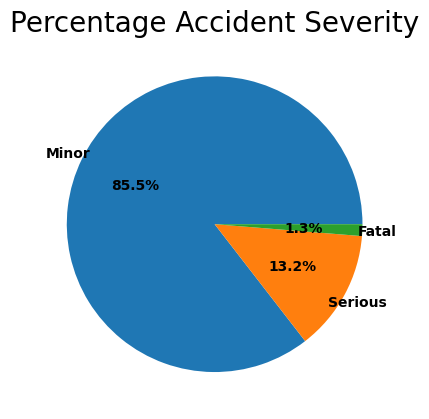

<Figure size 2000x2000 with 0 Axes>

In [56]:


mylabels = ['Minor','Serious','Fatal']
plt.title('Percentage Accident Severity',fontdict={'fontsize':20})
plt.pie(data['Accident_Severity'].value_counts(),labels = mylabels,startangle = 0,autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
       textprops={'color': 'Black', 'fontsize': 10, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'center'})
plt.figure(figsize=[20,20])

plt.show()



In [59]:
data.to_csv('C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Updated Road Accident Data.csv')

Accident_Index                1
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Longitude                     0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64